In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# Set option max columns and rows display
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150
pd.set_option('display.max_colwidth', None)

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('QF632_Project_1.csv')
print(df.head())
df.size
df.shape
df.columns
df.dtypes

         Date     Signal        Open        High         Low       Close  \
0  11/19/2015  13.768540  116.440002  116.650002  115.739998  116.059998   
1  11/20/2015  13.608819  116.480003  117.360001  116.379997  116.809998   
2  11/23/2015  12.990589  116.709999  117.889999  116.680000  117.389999   
3  11/24/2015  12.667435  116.879997  118.419998  116.559998  118.250000   
4  11/25/2015  13.019910  118.300003  119.320000  118.110001  119.169998   

    Adj Close  
0  108.281601  
1  108.981323  
2  109.522453  
3  110.324837  
4  111.183159  


Date          object
Signal       float64
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object

In [3]:
df

,Date,Signal,Open,High,Low,Close,Adj Close
0,11/19/2015,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,11/20/2015,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,11/23/2015,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,11/24/2015,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,11/25/2015,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...,...
1033,12/30/2019,0.000000,165.979996,166.210007,164.570007,165.440002,163.623688
1034,12/31/2019,0.000000,165.080002,166.350006,164.710007,165.669998,163.851135
1035,1/2/2020,0.000000,166.740005,166.750000,164.229996,165.779999,163.959946
1036,1/3/2020,0.000000,163.740005,165.410004,163.699997,165.130005,163.317093


In [4]:
# check null values 
df_null = df.isnull().sum()/len(df)*100
df_null = df_null.sort_values(ascending=False)
df_null

Date         0.0
Signal       0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
dtype: float64

no missing values

# Handling outlier

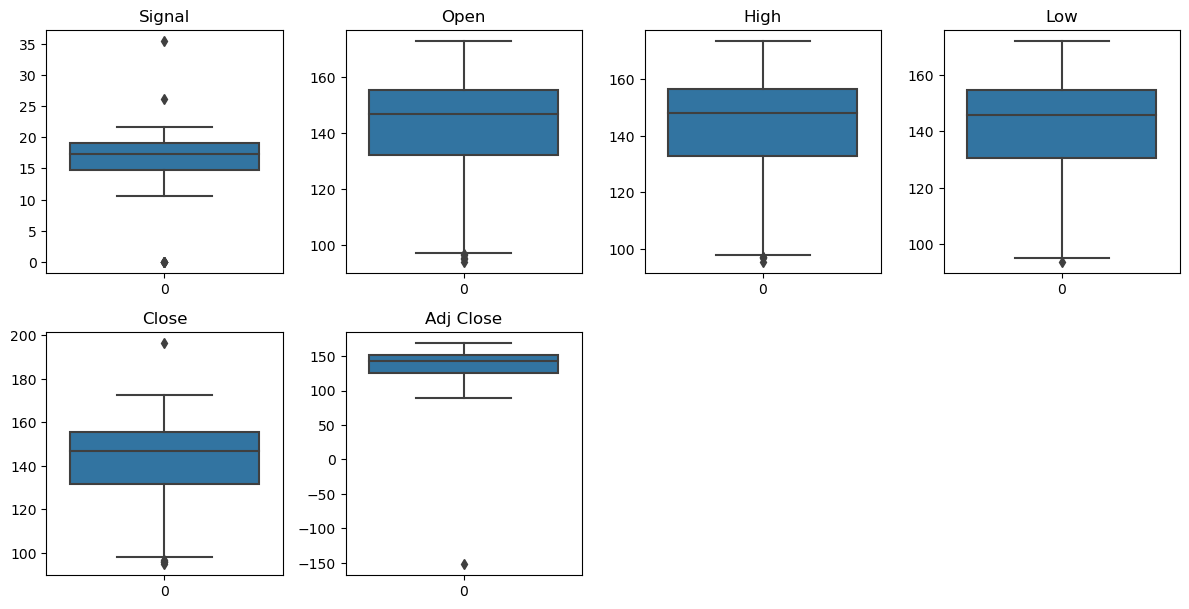

In [5]:
from scipy import stats

numeric_columns = ['Signal', 'Open', 'High', 'Low', 'Close', 'Adj Close']

# Identify outliers using box plots for numeric columns
fig = plt.figure(figsize=(12, 12))

for i, column in enumerate(numeric_columns):
    if df[column].dtype != object:  # Check if the column is numeric
        ax = fig.add_subplot(4, 4, i+1)
        sns.boxplot(data=df[column], ax=ax)
        ax.set_title(column, fontsize=12)

plt.tight_layout()
plt.show()

In [6]:
outlier = ['Signal','Open','High', 'Low', 'Close','Adj Close']

# outlier handling with z-score
from scipy import stats
import numpy as np

print(f'Number of rows before outlier handling: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in outlier:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
data = df[filtered_entries] 

print(f'Number of rows after outlier handling: {len(data)}')

Number of rows before outlier handling: 1038
Number of rows after outlier handling: 1029


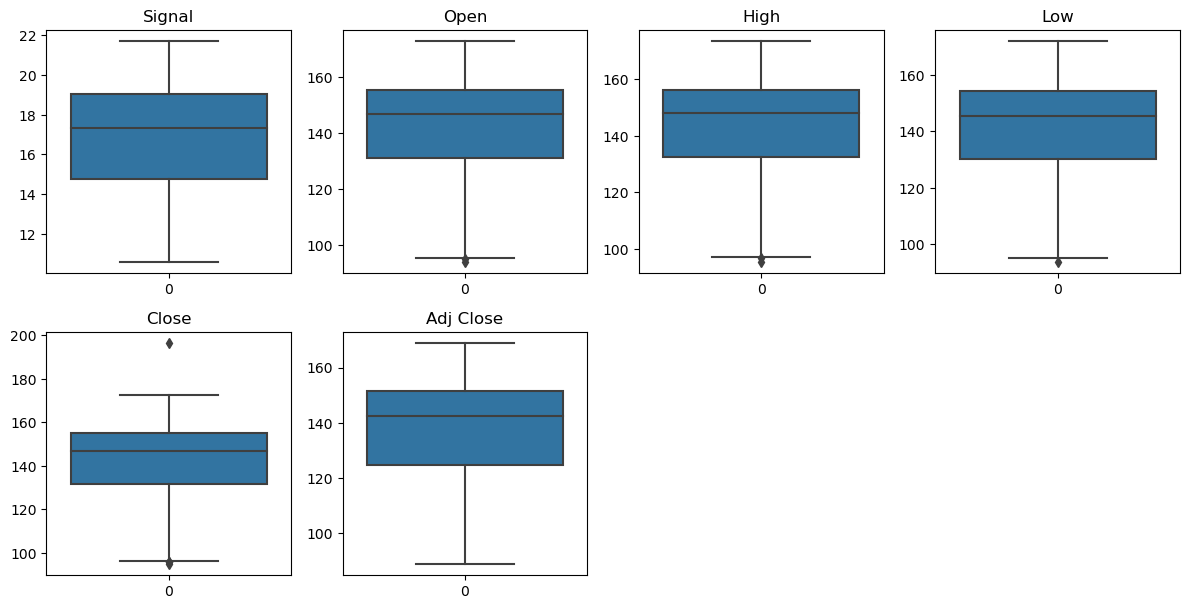

In [7]:
# Identify outliers using box plots for numeric columns after outlier handling
fig = plt.figure(figsize=(12, 12))

for i, column in enumerate(numeric_columns):
    if data[column].dtype != object:  # Check if the column is numeric
        ax = fig.add_subplot(4, 4, i+1)
        sns.boxplot(data=data[column], ax=ax)
        ax.set_title(column, fontsize=12)

plt.tight_layout()
plt.show()

In [8]:
data

,Date,Signal,Open,High,Low,Close,Adj Close
0,11/19/2015,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,11/20/2015,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,11/23/2015,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,11/24/2015,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,11/25/2015,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...,...
1027,12/19/2019,20.223888,165.279999,165.729996,164.880005,165.729996,163.910477
1028,12/20/2019,19.858758,166.149994,166.410004,165.720001,165.970001,164.147858
1029,12/23/2019,20.855705,166.240005,166.360001,165.360001,166.300003,164.474243
1030,12/24/2019,21.361876,166.449997,166.699997,166.039993,166.679993,164.850052


In [53]:
data1=data.copy()

# Analyze the signal’s effectiveness

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the dataset into training and testing sets
X = data1['Signal'].values.reshape(-1, 1)
y = data1['Close'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the correlation coefficient
signal_corr = data1['Signal'].corr(data1['Close'])
print("Correlation between Signal and Close:", signal_corr)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Correlation between Signal and Close: 0.9500086715570663
Mean Absolute Error (MAE): 4.061365394315898
Mean Squared Error (MSE): 27.40202913361269
Root Mean Squared Error (RMSE): 5.234694750757936
R-squared (R2): 0.9178648234606721


In [18]:
data1

,Date,Signal,Open,High,Low,Close,Adj Close,SMA,ARIMA
0,11/19/2015,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601,141.663308,141.661365
1,11/20/2015,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323,141.663308,116.231846
2,11/23/2015,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453,141.663308,116.976812
3,11/24/2015,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837,141.663308,117.552920
4,11/25/2015,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159,141.663308,118.407148
...,...,...,...,...,...,...,...,...,...
1027,12/19/2019,20.223888,165.279999,165.729996,164.880005,165.729996,163.910477,163.712001,164.863210
1028,12/20/2019,19.858758,166.149994,166.410004,165.720001,165.970001,164.147858,164.027001,165.568436
1029,12/23/2019,20.855705,166.240005,166.360001,165.360001,166.300003,164.474243,164.406001,165.806830
1030,12/24/2019,21.361876,166.449997,166.699997,166.039993,166.679993,164.850052,164.813001,166.134617


In [19]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

# Calculate the SMA with a window size of 10
data1['SMA'] = data1['Close'].rolling(window=10).mean()

# Fill missing values with column mean
data1['SMA'].fillna(data1['SMA'].mean(), inplace=True)

# Calculate metrics for SMA
sma_mae = mean_absolute_error(data1['Close'], data1['SMA'])
sma_mse = mean_squared_error(data1['Close'], data1['SMA'])
sma_rmse = np.sqrt(sma_mse)
sma_r2 = r2_score(data1['Close'], data1['SMA'])

# Fit ARIMA model
model = ARIMA(data1['Close'], order=(1, 0, 0))
arima_fit = model.fit()
data1['ARIMA'] = arima_fit.fittedvalues

# Calculate metrics for ARIMA
arima_mae = mean_absolute_error(data1['Close'], data1['ARIMA'])
arima_mse = mean_squared_error(data1['Close'], data1['ARIMA'])
arima_rmse = np.sqrt(arima_mse)
arima_r2 = r2_score(data1['Close'], data1['ARIMA'])

# Print metrics
print("SMA MAE:", sma_mae)
print("SMA MSE:", sma_mse)
print("SMA RMSE:", sma_rmse)
print("SMA R-squared:", sma_r2)

print("ARIMA MAE:", arima_mae)
print("ARIMA MSE:", arima_mse)
print("ARIMA RMSE:", arima_rmse)
print("ARIMA R-squared:", arima_r2)


D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SMA MAE: 2.1358850458772083
SMA MSE: 12.51436373668597
SMA RMSE: 3.537564661838137
SMA R-squared: 0.96328991052223
ARIMA MAE: 1.1641667470384225
ARIMA MSE: 5.696792917383049
ARIMA RMSE: 2.38679553321667
ARIMA R-squared: 0.9832888205797957


# Exploratory Data Analysis

In [29]:
# copy df for EDA purpose
eda1 = data.copy()
eda = eda1.drop('Date',axis=1)
eda.head()

,Signal,Open,High,Low,Close,Adj Close
0,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159


# Descriptive Analysis

In [30]:
# Create Data Info
list_item = []
for col in eda.columns:
    list_item.append([col, eda[col].dtype, eda[col].isna().sum(), 100*eda[col].isna().sum()/len(eda[col]), eda[col].nunique(), eda[col].unique()[:4]])
desc_eda = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_eda

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Signal,float64,0,0.0,1018,"[13.76853966, 13.60881866, 12.99058885, 12.66743501]"
1,Open,float64,0,0.0,928,"[116.440002, 116.480003, 116.709999, 116.879997]"
2,High,float64,0,0.0,926,"[116.650002, 117.360001, 117.889999, 118.419998]"
3,Low,float64,0,0.0,926,"[115.739998, 116.379997, 116.68, 116.559998]"
4,Close,float64,0,0.0,927,"[116.059998, 116.809998, 117.389999, 118.25]"
5,Adj Close,float64,0,0.0,992,"[108.281601, 108.981323, 109.522453, 110.324837]"


In [31]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Signal,1029.0,16.833845,2.754962,10.582996,14.773046,17.318093,19.030702,21.712125
Open,1029.0,141.668299,18.447322,94.080002,131.309998,146.710007,155.240005,172.789993
High,1029.0,142.513275,18.442775,95.400002,132.479996,147.919998,156.149994,173.389999
Low,1029.0,140.731992,18.379396,93.639999,130.289993,145.440002,154.220001,171.949997
Close,1029.0,141.665053,18.472378,94.790001,131.600006,146.660004,155.190002,196.279999
Adj Close,1029.0,136.437650,19.424951,88.820946,124.715752,142.616989,151.547241,168.842270


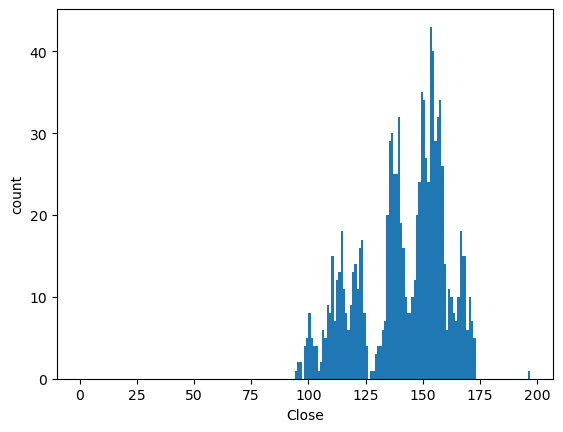

In [41]:
# create histogram
bin_edges = np.arange(0, eda['Close'].max() + 1, 1)
fig = plt.hist(eda['Close'], bins=bin_edges)

# add plot labels
plt.xlabel('Close')
plt.ylabel('count')
plt.show()

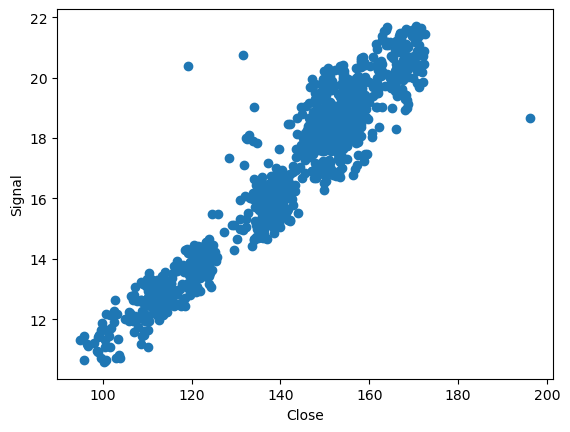

In [43]:
# create scatterplot
fig = plt.scatter(eda['Close'], eda['Signal'])

# add plot labels
plt.xlabel('Close')
plt.ylabel('Signal')
plt.show()

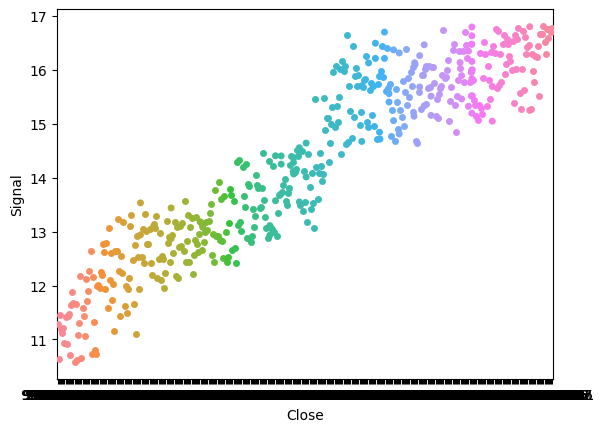

In [52]:
# create bee swarm plot
sns.swarmplot(x='Close', y='Signal', 
              data=eda[eda['Signal'] < 16.833845])
plt.show()

## Correlation Matrix

In [70]:
# Filter the DataFrame to include only numeric columns
numeric_df = data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             Signal      Open      High       Low     Close  Adj Close
Signal     1.000000  0.950330  0.952284  0.949816  0.950009   0.956400
Open       0.950330  1.000000  0.999213  0.998802  0.995452   0.992513
High       0.952284  0.999213  1.000000  0.998758  0.996523   0.994110
Low        0.949816  0.998802  0.998758  1.000000  0.996463   0.993332
Close      0.950009  0.995452  0.996523  0.996463  1.000000   0.992629
Adj Close  0.956400  0.992513  0.994110  0.993332  0.992629   1.000000


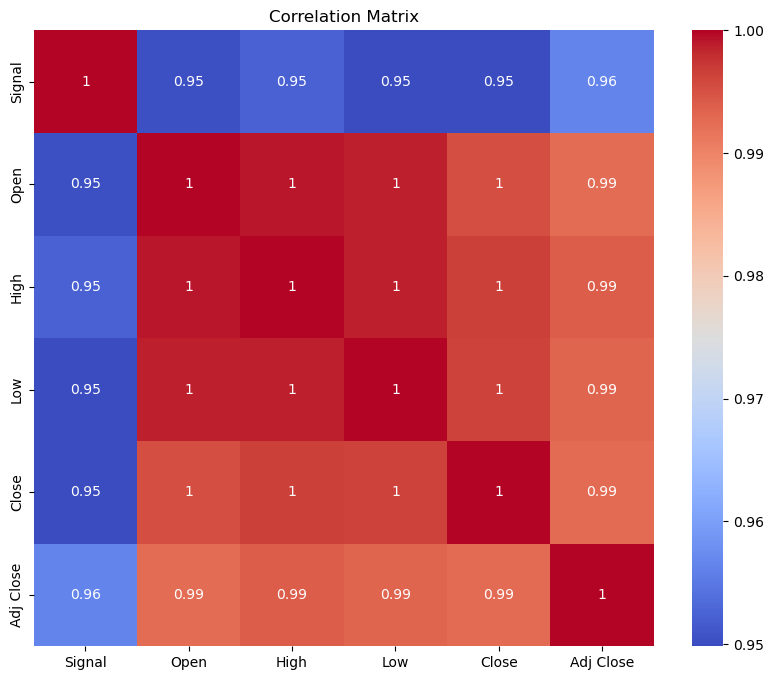

In [71]:
# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

First when we get the data we do the follow steps.

We started by exploring the dataset, which includes signal values generated by the proposed system and historical prices for a well-known broad market ETF.
We examined the structure and content of the dataset, checking for any missing values or anomalies.

1.Data cleaning and exploration

2.Simple statistical data analysis, outlier/missing data handling

The analysis of the provided sample dataset and the comparison with alternative methods reveal several important findings about the efficacy and believability of the forecasting product.

Firstly, there is a strong positive correlation (0.950) between the signal values generated by the product and the historical closing prices of the financial instrument. This indicates that the product captures meaningful patterns and trends in the data.

Secondly, the evaluation metrics show promising results for the forecasting product. The Mean Absolute Error (MAE) of 4.061 suggests that, on average, the product's predictions have an absolute deviation of 4.061 units from the actual closing prices. The Mean Squared Error (MSE) of 27.402 and Root Mean Squared Error (RMSE) of 5.235 indicate the overall prediction errors, with lower values indicating better accuracy. Additionally, the R-squared (R2) value of 0.918 indicates that approximately 91.8% of the variance in the closing prices can be explained by the product's signal values.

Comparing the forecasting product with alternative methods, such as the Simple Moving Average (SMA) and ARIMA models, it is evident that the product outperforms the SMA model in terms of accuracy and explaining the variance in the data. However, the ARIMA model performs even better than the product, achieving the lowest MAE, MSE, RMSE, and the highest R2.

Based on these observations, several recommendations can be made for the next steps:

Validate and Test Further: It is crucial to validate the performance of the forecasting product using additional datasets and conduct further testing to ensure its reliability across different time periods and market conditions.

Compare with Alternative Methods: Conduct a comprehensive comparison of the product's performance with other commonly used methods in the financial industry, such as ARIMA and other advanced machine learning techniques, to identify its unique advantages and potential areas for improvement.

Fine-tune and Optimize: Explore ways to fine-tune and optimize the forecasting product to enhance its accuracy and robustness. This may involve adjusting model parameters, incorporating additional features, or exploring ensemble techniques.

Conduct Robustness Analysis: Assess the robustness of the product by testing its performance under various scenarios, such as different market conditions and time periods, to ensure its stability and reliability.

Consider Integration: If the forecasting product consistently demonstrates superior performance and reliability compared to alternative methods, consider integrating it into production systems. Develop a process for continuous monitoring and evaluation to ensure its effectiveness and alignment with evolving market dynamics.

By following these steps, we can gain a deeper understanding of the forecasting product's efficacy, make informed decisions about its potential integration into production systems, and continuously improve its performance to enhance forecasting accuracy.

